In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [2]:
df=pd.read_csv('imdb_movies_shows.csv')

In [3]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [4]:
df.tail()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0
5805,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0


In [5]:
df.describe

<bound method NDFrame.describe of                                     title   type  release_year  \
0     Five Came Back: The Reference Films   SHOW          1945   
1                             Taxi Driver  MOVIE          1976   
2         Monty Python and the Holy Grail  MOVIE          1975   
3                           Life of Brian  MOVIE          1979   
4                            The Exorcist  MOVIE          1973   
...                                   ...    ...           ...   
5801                            Fine Wine  MOVIE          2021   
5802                       Edis Starlight  MOVIE          2021   
5803                                Clash  MOVIE          2021   
5804                       Shadow Parties  MOVIE          2021   
5805   Mighty Little Bheem: Kite Festival   SHOW          2021   

     age_certification  runtime                             genres  \
0                TV-MA       48                  ['documentation']   
1                    R      113  

In [6]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


In [8]:
df['age_certification'].value_counts()

age_certification
TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: count, dtype: int64

In [9]:
df['age_certification'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [10]:
df['release_year'].unique()

array([1945, 1976, 1975, 1979, 1973, 1969, 1971, 1964, 1980, 1967, 1966,
       1961, 1954, 1958, 1968, 1977, 1972, 1963, 1960, 1956, 1953, 1974,
       1959, 1962, 1978, 1986, 1989, 1984, 1990, 1987, 1983, 1982, 1981,
       1988, 1985, 1995, 2000, 1997, 1994, 1996, 1999, 1998, 1993, 1992,
       1991, 2008, 2010, 2004, 2005, 2003, 2009, 2007, 2006, 2001, 2002,
       2012, 2011, 2014, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2022,
       2021], dtype=int64)

In [11]:
df['genres'].value_counts()

genres
['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: count, Length: 1626, dtype: int64

In [12]:
type(df['genres'])

pandas.core.series.Series

Data Cleaning 
Dropping null values

In [13]:
df= df.dropna(subset=['title'])

In [14]:
df[df['title'].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


In [15]:
df= df.dropna(subset=['imdb_id'])

In [16]:
df[df['imdb_id'].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes


Converting genres and production countries to csv

In [17]:
df['genres'] = df['genres'].str.replace('[', '')
df['genres'] = df['genres'].str.replace(']', '')

In [18]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,'comedy',['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,'horror',['US'],NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",['GB'],4.0,tt0063929,8.8,72895.0


In [19]:
df['production_countries'] = df['production_countries'].str.replace('[', '')
df['production_countries'] = df['production_countries'].str.replace(']', '')

In [20]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0


In [21]:
def age_group(age_cert):
    if age_cert in ['TV-MA', 'R', 'NC-17']:
        return 'Adult'
    elif age_cert in ['PG','TV-14','G','PG-13','TV-PG']:
        return 'Requires Supervision'
    elif age_cert in ['TV-Y','TV-G','TV-Y7']:
        return 'Good for Children'
    else:
        return 'Not Rated'

In [22]:
df['age_group_ratings']= df['age_certification'].apply(age_group)

In [23]:
df['age_group_ratings'].value_counts()

age_group_ratings
Not Rated               2331
Requires Supervision    1392
Adult                   1364
Good for Children        274
Name: count, dtype: int64

In [24]:
children_movies = df['age_group_ratings'] == 'Good for Children'

In [25]:
children_movies_df = df [children_movies]

In [26]:
children_movies_df[children_movies_df.genres.str.contains('animation')]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_ratings
57,Thomas & Friends,SHOW,1984,TV-Y,10,"'family', 'comedy', 'music', 'action', 'animat...",'GB',24.0,tt0086815,6.5,4948.0,Good for Children
66,Fireman Sam,SHOW,1987,TV-Y,10,"'comedy', 'animation', 'family', 'crime', 'eur...",'GB',13.0,tt0329829,6.1,1759.0,Good for Children
67,Danger Mouse,SHOW,1981,TV-Y,15,"'comedy', 'family', 'scifi', 'animation', 'eur...",'GB',10.0,tt0081848,7.4,3514.0,Good for Children
107,Pokémon,SHOW,1997,TV-Y7,22,"'scifi', 'action', 'comedy', 'fantasy', 'anima...",'JP',24.0,tt0168366,7.6,172.0,Good for Children
121,The Magic School Bus,SHOW,1994,TV-Y,26,"'scifi', 'comedy', 'family', 'fantasy', 'anima...","'US', 'CA'",4.0,tt0108847,7.8,9708.0,Good for Children
...,...,...,...,...,...,...,...,...,...,...,...,...
5510,Karma's World,SHOW,2021,TV-Y,11,"'animation', 'comedy', 'family'",'US',2.0,tt13321232,6.2,134.0,Good for Children
5546,We the People,SHOW,2021,TV-Y7,5,"'family', 'music', 'animation', 'comedy'",'US',1.0,tt14770480,3.4,674.0,Good for Children
5586,The New Adventures of Oggy,SHOW,2021,TV-Y,15,"'comedy', 'family', 'action', 'animation'",'US',1.0,tt11194006,6.6,38.0,Good for Children
5604,I Heart Arlo,SHOW,2021,TV-Y7,15,"'comedy', 'family', 'animation'",'US',1.0,tt13573450,7.0,204.0,Good for Children


In [27]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_ratings
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0,Adult
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0,Requires Supervision
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0,Adult
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0,Adult
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0,Requires Supervision


1. Find the number of movies released in each decade from 1945 , show a line chart to display this

In [28]:
df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
age_group_ratings        object
dtype: object

In [30]:
children_movies = df["age_group_ratings"] == "Good For Children"

In [32]:
children_movies_df = df[df['age_group_ratings'] == 'Good for Children']


In [37]:
children_movies_df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_ratings
57,Thomas & Friends,SHOW,1984,TV-Y,10,"'family', 'comedy', 'music', 'action', 'animat...",'GB',24.0,tt0086815,6.5,4948.0,Good for Children
60,Saved by the Bell,SHOW,1989,TV-G,23,"'comedy', 'romance', 'family'",'US',5.0,tt0096694,7.1,34854.0,Good for Children
64,Wheel of Fortune,SHOW,1983,TV-G,26,'family','US',39.0,tt0072584,6.7,3126.0,Good for Children
66,Fireman Sam,SHOW,1987,TV-Y,10,"'comedy', 'animation', 'family', 'crime', 'eur...",'GB',13.0,tt0329829,6.1,1759.0,Good for Children
67,Danger Mouse,SHOW,1981,TV-Y,15,"'comedy', 'family', 'scifi', 'animation', 'eur...",'GB',10.0,tt0081848,7.4,3514.0,Good for Children
...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Marriage or Mortgage,SHOW,2021,TV-G,40,'reality','US',1.0,tt14037542,5.1,433.0,Good for Children
5586,The New Adventures of Oggy,SHOW,2021,TV-Y,15,"'comedy', 'family', 'action', 'animation'",'US',1.0,tt11194006,6.6,38.0,Good for Children
5604,I Heart Arlo,SHOW,2021,TV-Y7,15,"'comedy', 'family', 'animation'",'US',1.0,tt13573450,7.0,204.0,Good for Children
5695,Team Zenko Go,SHOW,2022,TV-Y,20,"'action', 'animation', 'family'",'US',1.0,tt18274176,7.2,21.0,Good for Children


In [36]:
genre_counts = children_movies_df['genres'].value_counts()


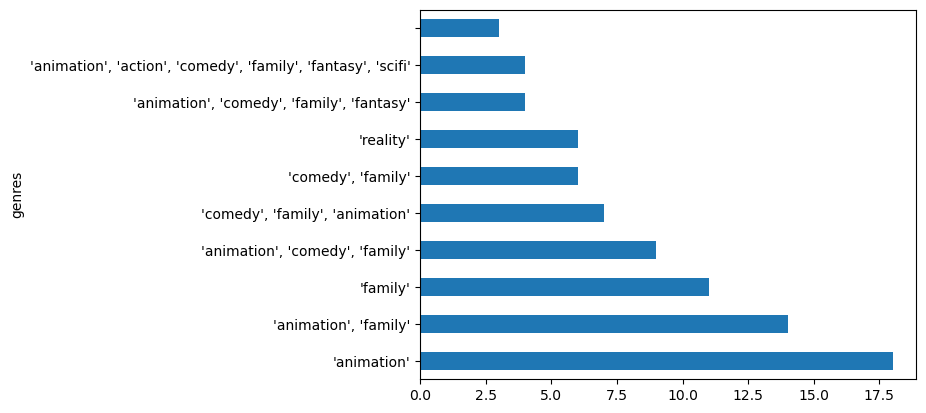

In [39]:
# Children genres in the dataset
children_movies_df['genres'].value_counts().head(10).plot(kind='barh')
plt.show()

### which of the genres have the highest runtime on the overal datatset and for each age group.

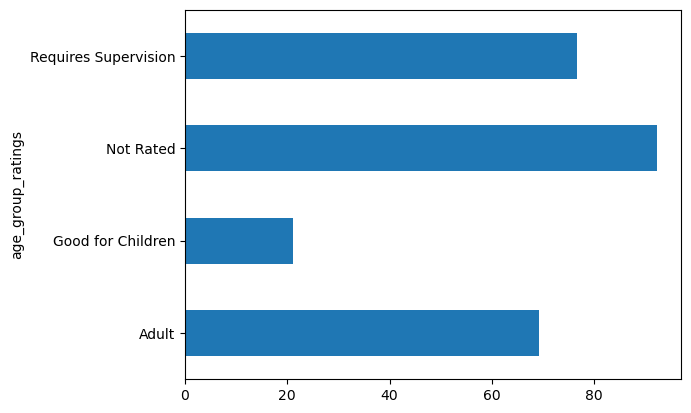

In [47]:
# Average runtime by type
df.groupby('age_group_ratings')['runtime'].mean().plot(kind='barh')
plt.show()

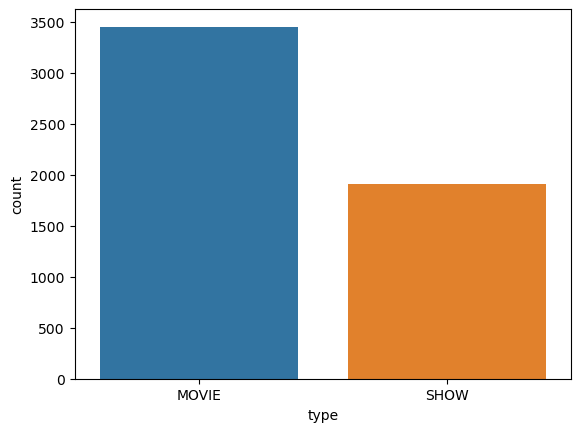

In [49]:
sns.countplot(x='type', data=df)
plt.show()

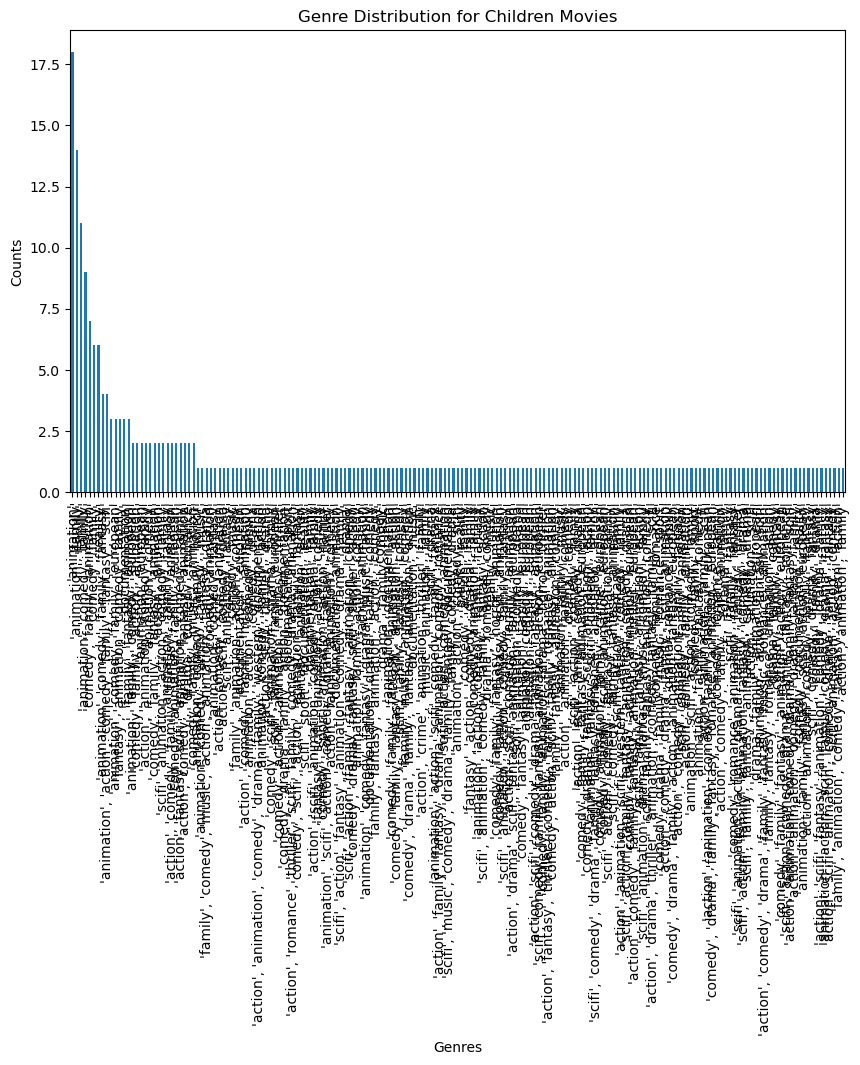

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
genre_counts.plot.bar()
plt.title('Genre Distribution for Children Movies')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.show()
